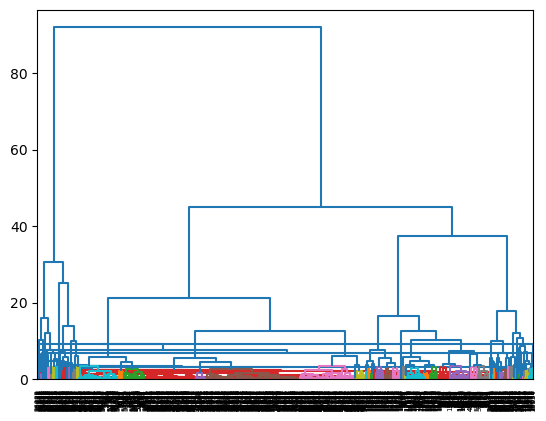

In [31]:
import pandas as pd
from sklearn import preprocessing
from sklearn.metrics import pairwise
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.cluster import KMeans
import matplotlib.pylab as plt
import seaborn as sns
from pandas.plotting import parallel_coordinates

diamondsdf = pd.read_csv('diamonds.csv')
numericcolumns = diamondsdf.select_dtypes(include=['number']).columns
diamondsdf[numericcolumns] = diamondsdf[numericcolumns].astype('float64')
numdiamondsdf= diamondsdf[numericcolumns]
sample_size = 1000
numdiamonddfsample = numdiamondsdf.sample(sample_size, random_state=42)


numdiamonddfsample= numdiamonddfsample.apply(lambda x: x.astype('float64'))
d=pairwise.pairwise_distances(numdiamonddfsample, metric='euclidean')
pd.DataFrame(d,columns=numdiamonddfsample.index,index=numdiamonddfsample.index)

numdiamonddfnorm=numdiamonddfsample.apply(preprocessing.scale,axis=0)
numdiamonddfnorm=(numdiamonddfsample-numdiamonddfsample.mean())/numdiamonddfsample.std()
numdiamonddfnorm[['carat','price']]
dnorm=pairwise.pairwise_distances(numdiamonddfnorm[['carat','price']],metric='euclidean')
pd.DataFrame(dnorm,columns=numdiamonddfnorm.index,index=numdiamonddfnorm.index)
Z=linkage(dnorm,method='single')
dendrogram(Z,labels=numdiamonddfnorm.index,color_threshold=2.75)
Z=linkage(dnorm,method='average')
dendrogram(Z,labels=numdiamonddfnorm.index,color_threshold=3.6)
plt.show()